<a href="https://colab.research.google.com/github/Nuranisah05/Machine_Learning_2025/blob/main/Praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum11"

In [ ]:
# Memanggil dan mencetak dataset
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


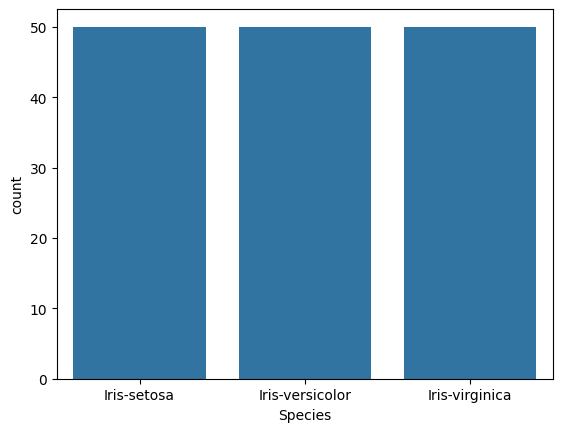

In [ ]:
sns.countplot(x='Species', data=df)
plt.show()

In [ ]:
#Firue untuk Clustering
X = df.drop(["Id", "Species"], axis=1)

In [ ]:
X[10:16]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
12,4.8,3.0,1.4,0.1
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4


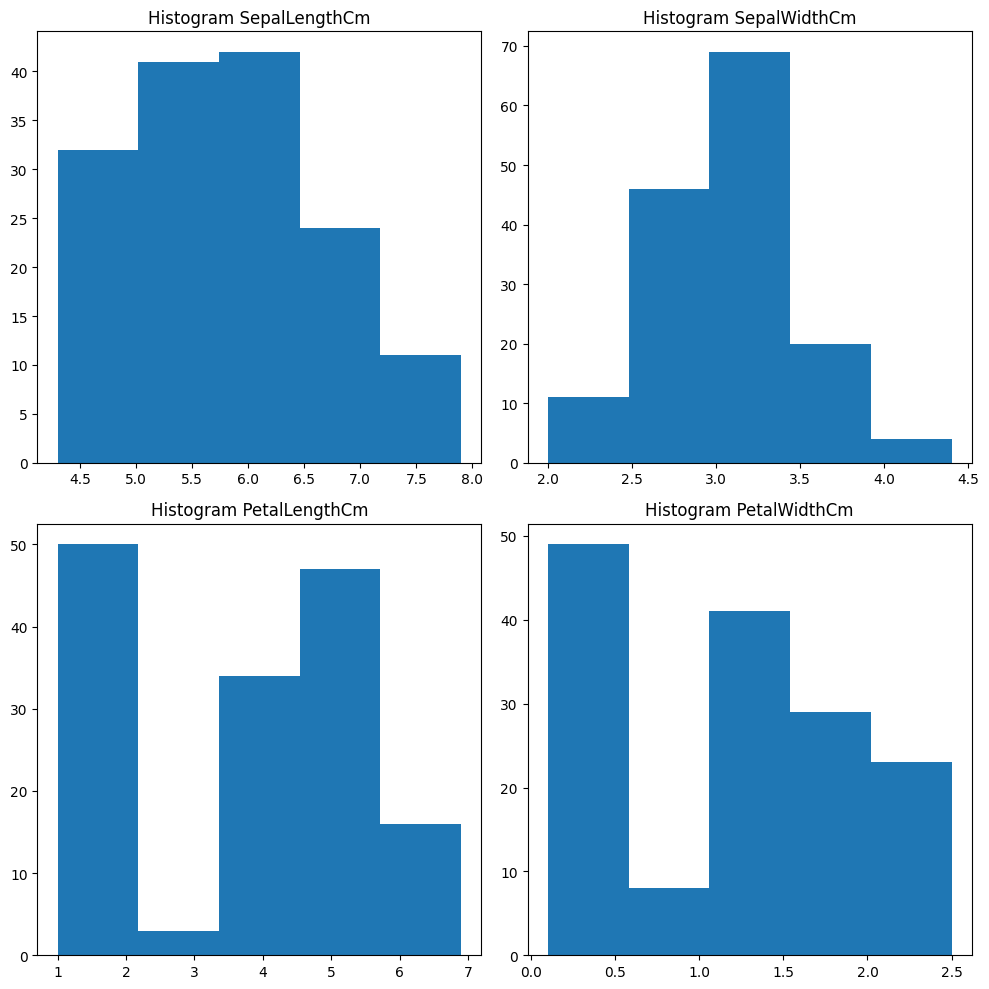

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
#Histogram 1: Sepal Lenght
axes[0, 0].set_title("Histogram SepalLengthCm")
axes[0, 0].hist(X["SepalLengthCm"], bins=5)

# Histogram 2: Sepal Width
axes[0, 1].set_title("Histogram SepalWidthCm")
axes[0, 1].hist(X["SepalWidthCm"], bins=5)

# Histogram 3: Petal Lenght
axes[1, 0].set_title("Histogram PetalLengthCm")
axes[1, 0].hist(X["PetalLengthCm"], bins=5)

# Histogram 4: Petal Width
axes[1, 1].set_title("Histogram PetalWidthCm")
axes[1, 1].hist(X["PetalWidthCm"], bins=5)

plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# **Praktikum di File Praktikum**

In [ ]:
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

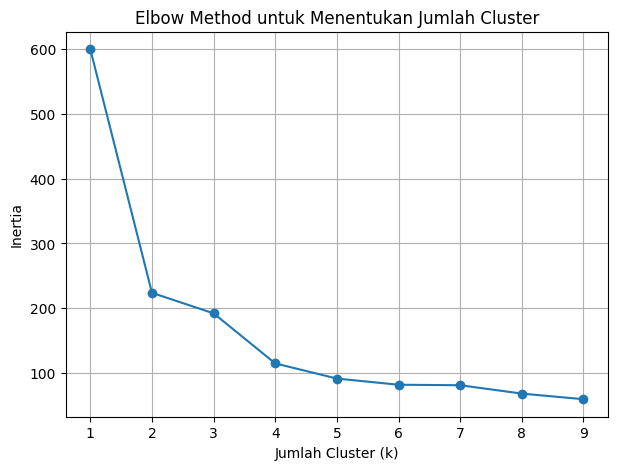

In [ ]:
inertia_list = []
K_range = range (1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(
    n_clusters=3,  # Karen dataset Iris ada 3 Spesies
    init="k-means++",
    random_state = 42
)

In [ ]:
#1. Latih model (menentukan centroit + proses clustering)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# 2. Prediksi cluster untuk data X
labels = kmeans.predict(X)

In [ ]:
# 3. Masukan ke Dataframe
df["Cluster"] = labels

In [ ]:
# df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 2 0]


In [ ]:
sil_score = silhouette_score(X, df["Cluster"])
print("\n===== SILHOUETTE SCORE =====")
print("Silhouette Score:", sil_score)


===== SILHOUETTE SCORE =====
Silhouette Score: 0.4787241921049546


In [ ]:
print("\n===== CONFUSION MATRIX =====")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


===== CONFUSION MATRIX =====
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


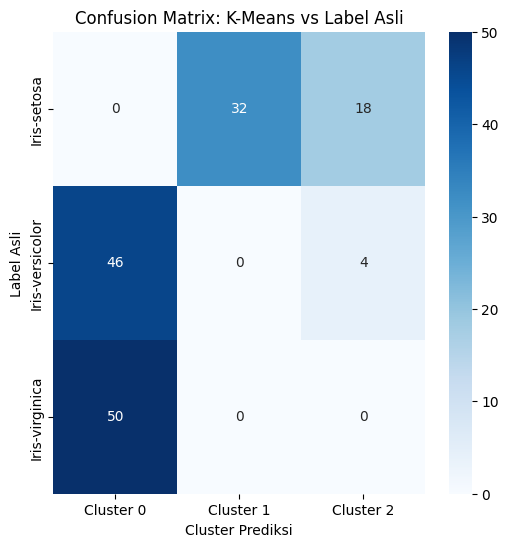

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(
    cm, annot = True, fmt='d', cmap='Blues',
    xticklabels = ["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels = le.classes_
)
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

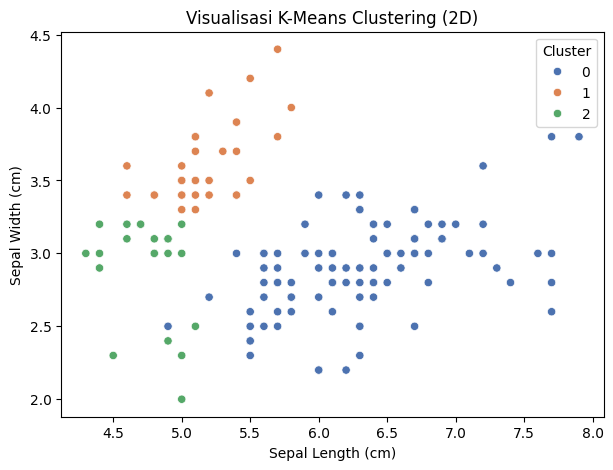

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)
plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

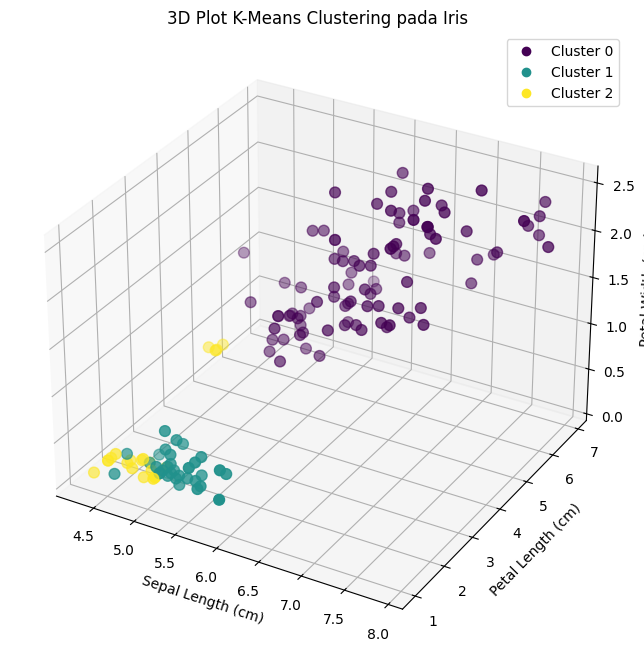

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['SepalLengthCm'],
    df['PetalLengthCm'],
    df['PetalWidthCm'],
    c=df['Cluster'],
    s=60
)

ax.set_title('3D Plot K-Means Clustering pada Iris')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

#Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

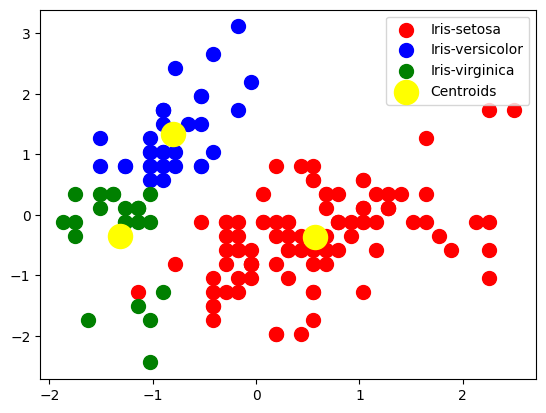

In [ ]:
# Visualisasi the cluster
plt.scatter(X[df["Cluster"] == 0, 0], X[df["Cluster"] == 0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[df["Cluster"] == 1, 0], X[df["Cluster"] == 1,1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(X[df["Cluster"] == 2, 0], X[df["Cluster"] == 2,1], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.legend()